In [104]:
import alpaca_trade_api as tradeapi
import warnings
warnings.filterwarnings("ignore")

# Set your Alpaca API credentials
APCA_API_KEY_ID = 'PK7R2YL3I6ENRQNP23AG'
APCA_API_SECRET_KEY = 'q2giGdyJpbGCXfB9xr4x76DrihGOtpxc19bnbGs3'
APCA_API_BASE_URL = 'https://paper-api.alpaca.markets'  # Use the paper trading base URL for testing

# Create an instance of the Alpaca API client
api = tradeapi.REST(APCA_API_KEY_ID, APCA_API_SECRET_KEY, base_url=APCA_API_BASE_URL, api_version='v2')

# Get account information
account = api.get_account()
print(f"Account ID: {account.id}")
print(f"Buying power: {account.buying_power}")
print(f"Equity: {account.equity}")

# Get historical data
symbol = 'AAPL'
start = '2015-01-01'
end = '2023-11-30'
SPY = api.get_bars(symbol, timeframe,start=start, end=end).df
SPY

Account ID: 6d73a764-7c20-4d02-b557-0cbd65838ff9
Buying power: 200000
Equity: 100000


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2016-01-04 05:00:00+00:00,105.35,105.368,102.00,351452,102.61,71935339,104.091749
2016-01-05 05:00:00+00:00,102.71,105.850,102.41,321365,105.75,58690536,103.400868
2016-01-06 05:00:00+00:00,100.70,102.370,99.87,409164,100.56,71079827,100.843959
2016-01-07 05:00:00+00:00,96.45,100.130,96.43,462836,98.68,85996453,98.011371
2016-01-08 05:00:00+00:00,96.96,99.110,96.76,419555,98.55,75066292,97.897369
...,...,...,...,...,...,...,...
2023-11-24 05:00:00+00:00,189.97,190.900,189.25,335950,190.87,24048346,189.789828
2023-11-27 05:00:00+00:00,189.79,190.670,188.90,509035,189.92,40570385,189.796649
2023-11-28 05:00:00+00:00,190.40,191.080,189.40,458379,189.78,38422811,190.164893


In [78]:
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [105]:
SPY['ma5'] = SPY['close'][::-1].rolling(5).mean()
SPY['ma30'] = SPY['close'][::-1].rolling(30).mean()
#calculate the diff between 30 and 5 day average
SPY['diff'] = abs(SPY['ma5']-SPY['ma30'])
SPY.index = pd.to_datetime(SPY.index).date
SPY.head()
#Targeted stock could be any stock in the market with high volatility 
#In the following I implement the strategy based on AAPL
# In the following process I will try to implement a momentum strategy that trade against the spread between short term avergae and long term average

,close,high,low,trade_count,open,volume,vwap,ma5,ma30,diff
2016-01-04,105.35,105.368,102.00,351452,102.61,71935339,104.091749,100.434,97.221000,3.213000
2016-01-05,102.71,105.850,102.41,321365,105.75,58690536,103.400868,99.070,96.980000,2.090000
2016-01-06,100.70,102.370,99.87,409164,100.56,71079827,100.843959,98.520,96.765000,1.755000
2016-01-07,96.45,100.130,96.43,462836,98.68,85996453,98.011371,97.858,96.609667,1.248333
2016-01-08,96.96,99.110,96.76,419555,98.55,75066292,97.897369,98.472,96.624000,1.848000


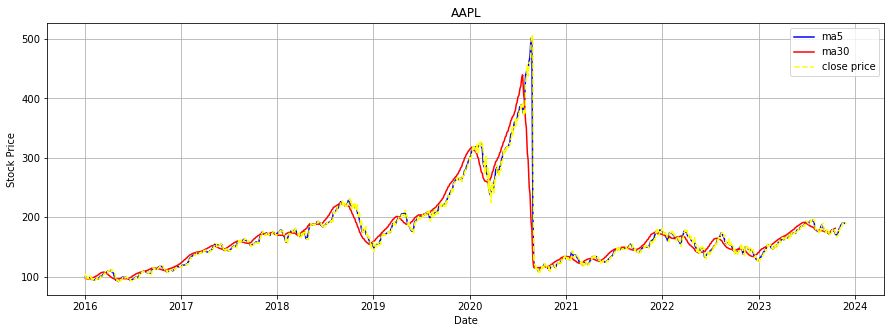

In [111]:
#plot the average 
SPY.index= pd.to_datetime(SPY.index,format='%Y%m%d') 
plt.figure(figsize=(15,5)) 
plt.rcParams['axes.unicode_minus']=False 
plt.plot(SPY['ma5'],color='blue',label='ma5')
plt.plot(SPY['ma30'],color='red',label='ma30')
plt.plot(SPY['close'],color='yellow',linestyle='--',label='close price')
plt.legend()
plt.title("AAPL") 
plt.ylabel('Stock Price')
plt.xlabel('Date')
plt.grid() 
plt.show() 

In [107]:
# calculate the date of golden cross and death cross
# creat a list to store the date
golden_cross=[]
death_cross=[]
# calculate the date
for i in range(1,len(SPY)):
	if SPY['ma5'][i]>=SPY['ma30'][i] and SPY['ma5'][i+1]<SPY['ma30'][i+1]:
		golden_cross.append(SPY.index[i])
	if SPY['ma5'][i]<=SPY['ma30'][i] and SPY['ma5'][i+1]>SPY['ma30'][i+1]:
		death_cross.append(SPY.index[i])

golden_series=pd.Series(1,index=golden_cross) # creat golden cross series
death_series=pd.Series(0,index=death_cross) # creat death cross series
signal = pd.concat([golden_series, death_series]).sort_index()
print(signal)


2016-01-22    1
2016-03-21    0
2016-04-26    1
2016-05-19    0
2016-06-13    1
             ..
2023-08-03    1
2023-08-21    0
2023-09-20    1
2023-10-04    0
2023-10-10    1
Length: 73, dtype: int64


In [108]:
# calculate PNL
original_money1=1000000 # original asset 
money1 = original_money1 # net value change
hold1=0 #number of holdings
money_list1=[1000000]
hold_list1=[0]

trade_date_list1=['2016-01-01 00:00:00']
total_value_list1=[1000000]
                  
for i in range(0,len(signal)):
    oprice1 = SPY[SPY.index==signal.index[i]]['open'].values # get the open price 
    cprice1 = SPY[SPY.index==signal.index[i]]['close'].values # get the close price
    if signal.iloc[i]==1:
        # If the intake is 1 which indicate the date of golden cross, we buy in
        buy1=money1//oprice1 # calculate number of shares to buy in
        hold1=hold1+buy1 #rebalance hold 
        money1=money1-buy1*oprice1 #calculate money left
        money_list1.append(money1)
        hold_list1.append(hold1)
        trade_date_list1.append(signal.index[i])
        total_value_list1.append(money1+hold1*cprice1)
    else:
        # If the intake is 0 which indicate the date of death cross, we sell out 
        money1=money1+hold1*oprice1 # calculate money left
        hold1=0 # sell all the stock in hand
        money_list1.append(money1)
        hold_list1.append(hold1)
        trade_date_list1.append(signal.index[i])
        total_value_list1.append(money1+hold1*cprice1)
    money_list1.append(money1)
    hold_list1.append(hold1)
    trade_date_list1.append(signal.index[i])
    total_value_list1.append(money1+hold1*SPY['close'][0]) 
a={"trade_date":trade_date_list1,
 "money":money_list1,
 "hold":hold_list1,
 "total_value":total_value_list1
 }
SMA1=DataFrame(a)
SMA1['cumulative_rets']=SMA1['total_value']/1000000-1

#creat date frame of all infomations 
SMA1_ = DataFrame()
SMA1_.index = SPY.index
SMA1_['close'] = SPY['close']
SMA1_['cash'] = 1000000
SMA1_['hold'] = 0
SMA1_ = SMA1_.sort_index() #将日期排序，使得dataframe从20200101到20210501排列
for i in range(0, len(SMA1_)):
    for j in range(0, len(SMA1)):
        if SMA1_.index[i] == SMA1['trade_date'].iloc[j]:
            SMA1_['cash'].iloc[i] = SMA1['money'].iloc[j]
            SMA1_['hold'].iloc[i] = SMA1['hold'].iloc[j]
            break
        else:
            SMA1_['cash'].iloc[i] = SMA1_['cash'].iloc[i-1]
            SMA1_['hold'].iloc[i] = SMA1_['hold'].iloc[i-1]
SMA1_['total_value'] = SMA1_['cash'] + SMA1_['hold']*SMA1_['close'] 
SMA1_['cumulative_rets'] = SMA1_['total_value']/1000000-1
SMA1_['passive'] = SMA1_['close']/(SMA1_.loc[SMA1_.index[0],['close']].values)-1
SMA1_


,close,cash,hold,total_value,cumulative_rets,passive
2016-01-04,105.35,1000000.000,0,1000000.000,0.000000,0.000000
2016-01-05,102.71,1000000.000,0,1000000.000,0.000000,-0.025059
2016-01-06,100.70,1000000.000,0,1000000.000,0.000000,-0.044139
2016-01-07,96.45,1000000.000,0,1000000.000,0.000000,-0.084480
2016-01-08,96.96,1000000.000,0,1000000.000,0.000000,-0.079639
...,...,...,...,...,...,...
2023-11-24,189.97,162.284,31569,5997325.214,4.997325,0.803227
2023-11-27,189.79,162.284,31569,5991642.794,4.991643,0.801519
2023-11-28,190.40,162.284,31569,6010899.884,5.010900,0.807309
2023-11-29,189.37,162.284,31569,5978383.814,4.978384,0.797532


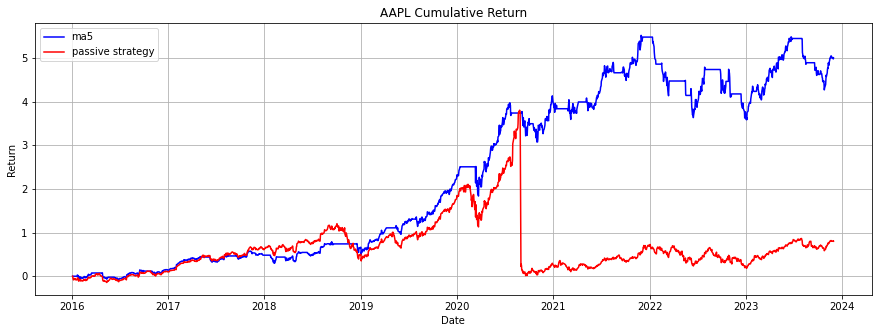

In [110]:
plt.figure(figsize=(15,5)) 
plt.plot(SMA1_['cumulative_rets'],color='blue',label='ma5')
plt.plot(SMA1_['passive'],color='red',label='passive strategy')
plt.legend()
plt.title("AAPL Cumulative Return") 
plt.ylabel('Return')
plt.xlabel('Date')
plt.grid() 
plt.show() 